In [3]:
import pandas as pd

In [4]:
# Reference: Import data from Yahoo Finance - https://finance.yahoo.com/quote/CSV/history/?guccounter=1&period1=1356998400&period2=1703980800
# Asset name: Carriage Services, Inc. (CSV)
# Currency: USD (United  State Dollar)
df = pd.read_csv("finance.yahoo.com 2013-2023.csv")

In [5]:
# Display the count of columns and rows
df.shape

(2768, 7)

In [6]:
# Display the records
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,11.91,13.52,11.90,13.45,11.948698,208100
1,2013-01-03,13.55,13.59,12.87,12.90,11.460092,106000
2,2013-01-04,12.99,13.25,12.48,13.22,11.744374,54800
3,2013-01-07,13.15,13.22,13.00,13.05,11.593348,33300
4,2013-01-08,13.05,13.25,12.96,13.00,11.548930,31700


In [7]:
# Display the duplicates rows
df.duplicated().sum()

0

In [8]:
# Display the missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [10]:
# assign only column Date and Close to our dataframe object
df = df[['Date','Close']]
df.head()

,Date,Close
0,2013-01-02,13.45
1,2013-01-03,12.90
2,2013-01-04,13.22
3,2013-01-07,13.05
4,2013-01-08,13.00


In [11]:
# Convert the 'Date' column to datetime format
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

## Visualizing Dataset

Let's visualize the close USD (dollar) price between 2013 and 2023. The code for producing this visualization is as follows:

<Figure size 1200x500 with 0 Axes>

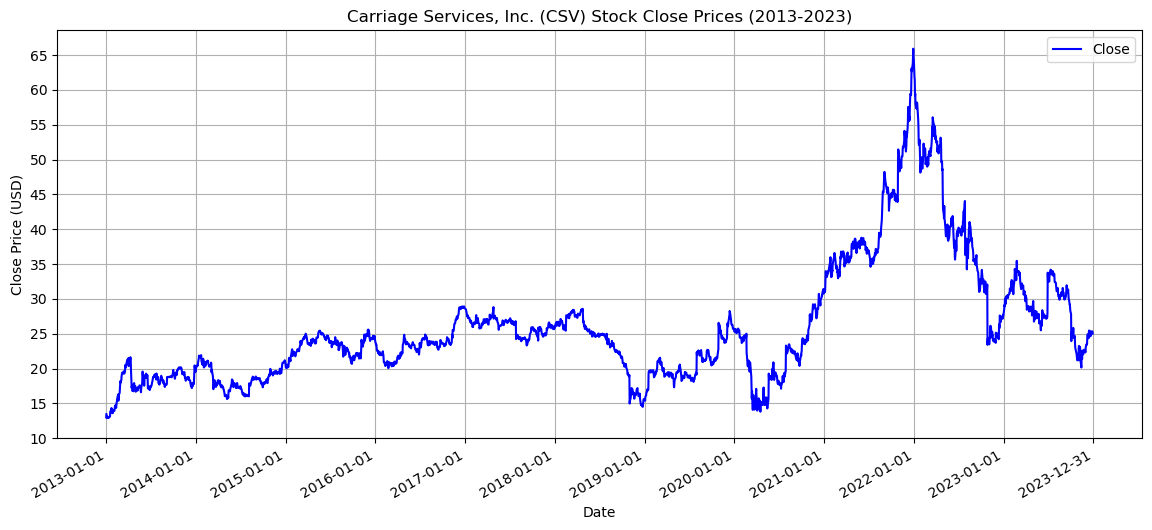

In [13]:
import matplotlib.pyplot as plt

# Visualize Carriage Services, Inc. (CSV) Stock Close Prices (2013-2023)
plt.figure(figsize=[12, 5]); # Set dimensions for figure
df.plot(figsize = (14, 6), color = 'b')   # 
plt.title('Carriage Services, Inc. (CSV) Stock Close Prices (2013-2023)')
plt.ylabel('Close Price (USD)')
plt.xlabel('Date')
plt.xticks(ticks=['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2023-12-31'])
plt.yticks(ticks=[10,15,20,25,30,35,40,45,50,55,60,65])
plt.legend()
plt.grid(axis='both')
plt.show()

## Testing the Stationarity of the Dataset

The Augmented Dickey-Fuller test can be used to test for a unit root, in other words if it has seasonal patterns.
And, is very important to know if our dataset has seasonal patterns or not because we will need to choice which model is better for our dataset between ARIMA or SARIMA.
- ARIMA has better results without seasonal patterns
- SARIMA has better results with seasonal patterns

Let try to find if our dataset has or not seasonal patterns using ADF as mentioned before.

In [14]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(df['Close'])

# Display the outcome of Augmented Dicky-Fuller Test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.1131095222776044
p-value: 0.23927597537488843


First, we have to know about p-value significance.
- if our p-value is greater than 0.05 we say it has unit root (non-stationary)
- if our p-value is less or equal than 0.05 we say it doesn't has unit root (stationary)

The presence of a unit root indicates that the time series is non-stationary, meaning its statistical properties (mean, variance) change over time, making it more challenging to model and forecast.

We can easily see p-value is greater than 0.05 and it tell us that our dataset has great chances to be seasonal patterns.

Conclusion:
- unit root = seasonal = non-stationarity = p > 0.05 = null hypothesis
- no unit root = non-seasonal = stationarity = p <= 0.05 = non-null hypothesis

Note: be carefully analysing this p-value, something we get exponential p-value as example '1.0850793453618563e-07' and it mean that our p-value is actually 0.00000010850793453618563 (p-value less than 0.05)

## Differencing

Since the p-value is large, we cannot reject the null hypothesis (also knows as unit root) and must assume that the time series is non-stationary. We commit to the first order differencing of electricity values and perform ADF test again on the dataset.

In [ ]:
df['Close First Difference'] = df['Close'].diff(1)
# Shift index by desired number of periods with an optional time `freq`.

# Show first five records
df.head()

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
df = df.iloc[1: , :]

# Display the first five records
df.head()

In [ ]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(df['Close First Difference'])

# Display the outcomes of Dicky Fuller test
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')